## Question 1 
### (Answer and explanation is below the code)

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/jiyuzhi/winter_data.csv')

In [4]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [7]:
print("The average given in the question: ", data['order_amount'].sum()/len(data))

The average given in the question:  3145.128


I would like to check the distribution of the dataset, and find out if there is a problem about skewness and outlier that can heavily influence the average.

In [55]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

<AxesSubplot:>

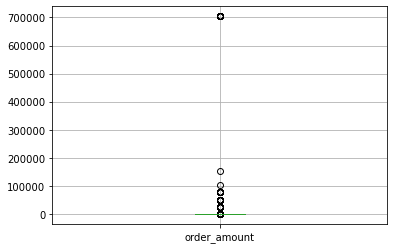

In [27]:
data.boxplot(column = 'order_amount')

In [42]:
order_number_amount= data.groupby(['order_amount']).size().reset_index(name='order_numbers').sort_values(by='order_amount', ascending=False)
order_number_amount.head(10)

,order_amount,order_numbers
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [46]:
data2 = data.loc[data['order_amount'].isin([704000, 154350, 102900, 77175, 51450, 25725])].sort_values(by='order_amount', ascending=False)
data2

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
...,...,...,...,...,...,...,...
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:22
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00


In [53]:
data2['shop_id'].unique()

array([42, 78])

According to the result above, the outlier of order amount appears in store 42 and store 78. I would like to see the distribution of the dataset if the outliers are removed.

<AxesSubplot:>

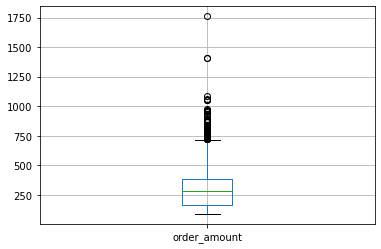

In [58]:
data3 = data.loc[~data['order_amount'].isin([704000, 154350, 102900, 77175, 51450, 25725])]
data3.boxplot(column = 'order_amount')

In [59]:
data3.order_amount.describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

After dropping all the large order amount, the standard deviation is now 160.80, which is more reasonable than the number previously (41282.5). However, according to the boxplot, the data is still skewed.

In [100]:
order_per_shop= data3.groupby(['shop_id'])['order_amount'].sum().reset_index(name='order_amount').sort_values(by='shop_id', ascending=True)
total_per_shop= data3.groupby(['shop_id'])['total_items'].sum().reset_index(name='total_items').sort_values(by='shop_id', ascending=True)

In [101]:
summary_data = pd.merge(total_per_shop, order_per_shop, on = 'shop_id')

In [102]:
summary_data['aov'] = summary_data['order_amount']/summary_data['total_items']
summary_data.head(10)

,shop_id,total_items,order_amount,aov
0,1,86,13588,158.0
1,2,102,9588,94.0
2,3,99,14652,148.0
3,4,103,13184,128.0
4,5,92,13064,142.0
5,6,121,22627,187.0
6,7,109,12208,112.0
7,8,84,11088,132.0
8,9,117,13806,118.0
9,10,119,17612,148.0


In [103]:
result = summary_data['aov'].median()
result

153.0

a. Based on the analysis above, the estimate of AOV = 3145.13 given in the question is not representitive in the question becuase the standard deviation for order amount is 41282.5, which indicates that the data points are far away from the mean. Also, by checking the boxplot, we can see that the data is extremely skewed, which also shows us that using total average to estimate the aov is not effective in this case. Instead, I choose to remove the outliers, and calculate the AOV per shop. Because the AOV per store provides information about the value of orders in different shop, so it is more accurate. 

b. I choose to report the "result" variable, which is the mediam of the AOV per shop.

c. The value is 153.0

## Question 2